<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Exam Coding 1
***
Nathan Shaver

This exam coding segment is due on Canvas by **11:59 PM on Friday October 15*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1Dl7ndZbcSZhIRM-1_OXXue5D8VgMd9NP?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [40 points] Problem 1: Working with Data

You've been hired as part of the data team for the hit new mobile game, *League of Fledglings*, where you choose an adorable baby animal as your avatar and wage "battles" with other players to determine who will rule over Baby Animal Farm.  Being a mobile game, *League of Fledglings* is highly monetized, and players are regularly encouraged to purchase access to *Fledgies*, which alter the appearance of your in-game avatar fledgling.  After all, why use a regular baby elephant when you could pay money to use a *chartreuse* baby elephant?  

After each game, players are asked to evaluate how much they enjoyed that game (on a scale of 1-10).  They are also presented with a link to a new *Fledgie* to consider purchasing.

In `pay2win.csv` your bosses have provided you with one month's player data.  Each of the 2430 rows are the data for a different user.  For each player, you have been provided with the following:

- Age: the player's self-reported age on account creation.
- Sex: the player's self-reported sex on account creation.  A "choose not to report/nonbinary" option is available.
- Interest: the player's median response to the "enjoyment" poll.
- Clicks: the number of times that month that the player clicked on the link to a new *Fledgie*.
- Purchased: the dollar amount purchased by the player that month.


In [2]:
df=pd.read_csv('/home/jovyan/3022/exams/midterm1/pay2win.csv')
print(df.head())
print(df.describe())

   Unnamed: 0        Age Sex  Interest  Clicks   Purchased
0           0  63.865290   M       7.0       2    0.000000
1           1  47.618445   M       1.0       1   36.142801
2           3  67.354456   M       9.0       1    0.000000
3           4  53.581144   M       4.0       1    0.000000
4           5  51.136906   M       7.0       2  195.725535
        Unnamed: 0          Age     Interest       Clicks    Purchased
count  7580.000000  7580.000000  7580.000000  7580.000000  7580.000000
mean   4982.551847    43.076898     5.615172     1.728232    86.893230
std    2879.073283    15.973868     2.372559     1.874199   155.192298
min       0.000000     8.000000     0.000000     0.000000     0.000000
25%    2513.750000    29.787473     3.000000     0.000000     0.000000
50%    4951.500000    43.105088     6.000000     1.000000     0.000000
75%    7470.250000    56.715565     7.000000     3.000000   123.644589
max    9999.000000    76.343229    10.000000    14.000000  1502.236449


**Part A:** Explore

Create histograms of each of the 5 columns.  For each variable, describe how many modes it has and if it's unimodal whether or not it exhibits any skewness (be careful with binning on `Purchased`).  Use `df.describe` to get an overall picture of the data.

Text(0.5, 1.0, 'Number of players with a given amount of purchased amount')

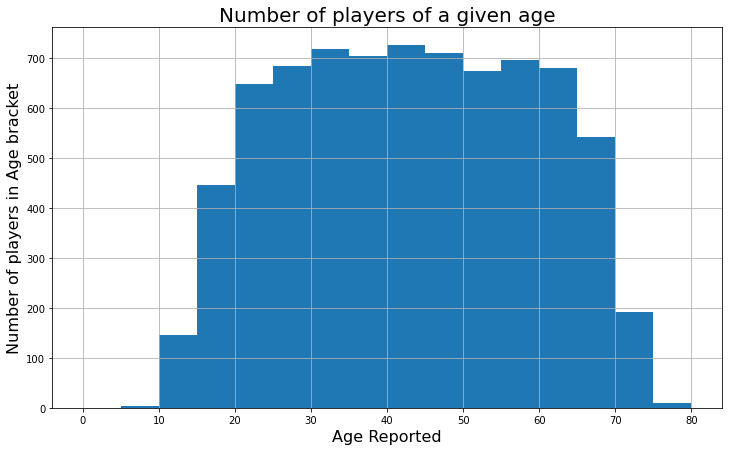

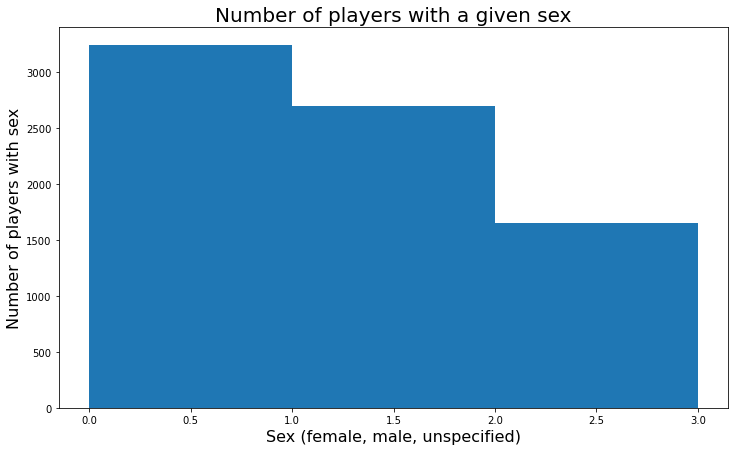

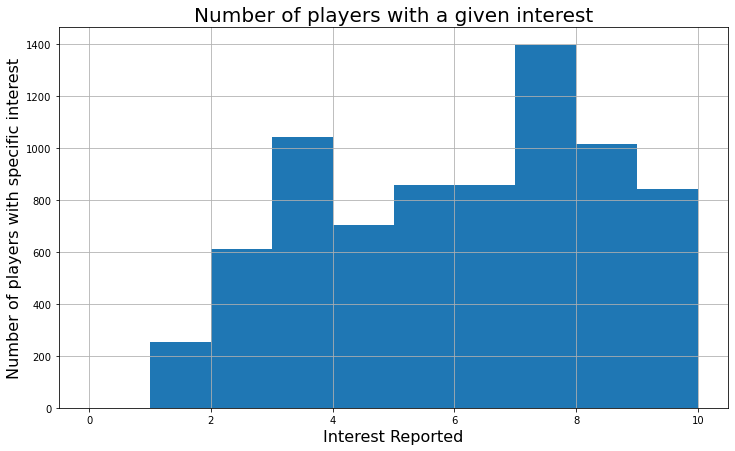

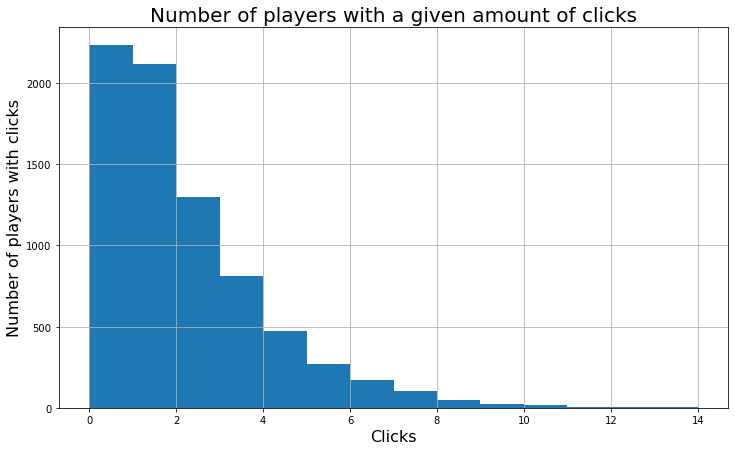

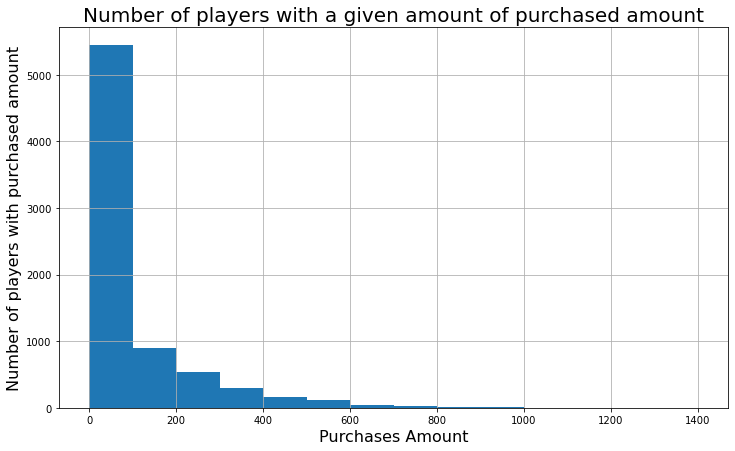

In [3]:
#make histograms, use describe

#plotting and labeling the age histogram
fig, ax1 = plt.subplots(1,1, figsize = (12,7))
binsList = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
df.hist(column = "Age", ax = ax1, bins = binsList)
ax1.set_xlabel("Age Reported", fontsize=16)
ax1.set_ylabel("Number of players in Age bracket", fontsize=16)
ax1.set_title("Number of players of a given age", fontsize=20)

#organizing the sex's into calculable values
binsList10 = [0,1,2,3]
sexCounts = df["Sex"].value_counts().tolist()
sexHist = np.array(1)
i = 0
while(i < sexCounts[0]):
    sexHist = np.append(sexHist, .5)
    i = i + 1
i = 0
while(i < sexCounts[1]):
    sexHist = np.append(sexHist, 1.5)
    i = i + 1
i = 0
while(i < sexCounts[2]):
    sexHist = np.append(sexHist, 2.5)
    i = i + 1

#plotting and labeling the sex histogram with the newly made values from above
fig, ax0 = plt.subplots(1,1, figsize = (12,7))
binsList5 = [0,1,2,3]
ax0.hist(sexHist, bins = binsList5)
ax0.set_xlabel("Sex (female, male, unspecified)", fontsize=16)
ax0.set_ylabel("Number of players with sex", fontsize=16)
ax0.set_title("Number of players with a given sex", fontsize=20)

#plotting and labeling the interest histogram
fig, ax2 = plt.subplots(1,1, figsize = (12,7))
df.hist(column = "Interest", ax = ax2, bins = 10)
ax2.set_xlabel("Interest Reported", fontsize=16)
ax2.set_ylabel("Number of players with specific interest", fontsize=16)
ax2.set_title("Number of players with a given interest", fontsize=20)

#plotting and labeling the clicks histogram
fig, ax3 = plt.subplots(1,1, figsize = (12,7))
binsList1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
df.hist(column = "Clicks", ax = ax3, bins = binsList1)
ax3.set_xlabel("Clicks", fontsize=16)
ax3.set_ylabel("Number of players with clicks", fontsize=16)
ax3.set_title("Number of players with a given amount of clicks", fontsize=20)

#plotting and labeling the purchased histogram
fig, ax4 = plt.subplots(1,1, figsize = (12,7))
binsList2 = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
df.hist(column = "Purchased", ax = ax4, bins = binsList2)
ax4.set_xlabel("Purchases Amount", fontsize=16)
ax4.set_ylabel("Number of players with purchased amount", fontsize=16)
ax4.set_title("Number of players with a given amount of purchased amount", fontsize=20)


**Markdown for A**

The age histogram has a mode at the 40-45 age bin. However there are several other bins that come close and could also be considered a mode, depending on the amount of bins chosen. It also does not have any general skewness, with the histogram being roughly equal on both sides of the mode.

The sex histogram has a mode for females. It also exhibits right skewness, although it is fairly arbitrary since males, females and unspecified are not values.

The interest histogram has a mode at 7. It also exhibits a left skewness.

The clicks histogram has a mode at in the 0-1 bin. The histogram exhibits an intense right skew, with no data points being left of the mode.

The purchase histogram has a mode in the 0-100 bin. This histogram also exhibits an intense right skew, with no data points being left of the mode.

**Part B:** Shape

The data provided is *simulated*; Zach will share the code used to generate it with the solutions.  Many in-class distributions were used to create the data!  In particular:

- (i) One column was created with a uniform random variable.
- (ii) Another column was created with `stats.poisson.rvs`
- (iii) One column was created by summing a number of `stats.expon.rvs`

Based on the data provided, which columns could have been made by the functions in (i)-(iii)?

**Markdown for B**

(i) Is likely the age histogram. This histogram does not have any clear cut modes, depending on the amount of bins chosen. The data is uniformly distributed for almost the entire histogram until the tails begin to fall off. A uniform random variable is perfect for making these kind of graphs.

(ii) Is likely the clicks histogram. A poisson distribution graphically appears as a unimodal distribution with a right or left skew. The clicks histogram fits this descritpion.

(iii) Is likely the purchases histogram. An exponential graph increases or decreases at an increasing rate. The purchases histogram appears to fit this description.

**Part C:** Analyze relationships

Management wants to know how their surveys are useful in determining either clicks or purchases, and how their clicks are converted into sales.  To that end, create the following plots:
- A line plot that shows survey score versus mean purchase values for that interest level
- A pair of overlayed density histograms that show the purchase values of customers that return survery values of 5 or less against those that return survery values of 6 or more.
- A scatter plot that shows clicks versus purchase values 

Tell management if there appears to be a visual relationship between survey results and purchases.

Text(0.5, 1.0, 'Clicks vs Purchased Money')

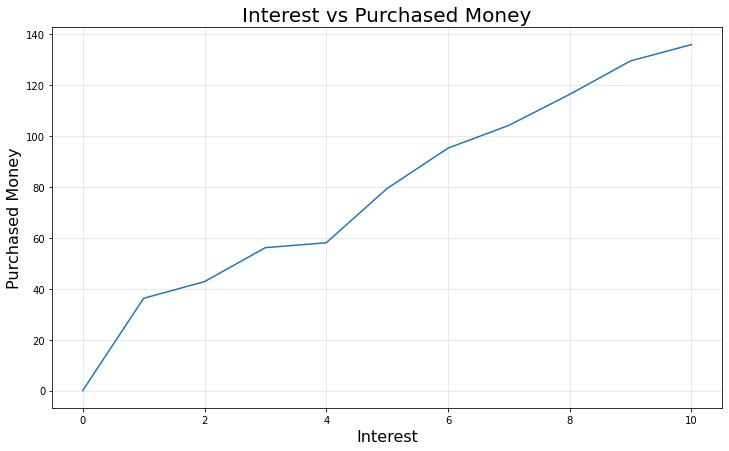

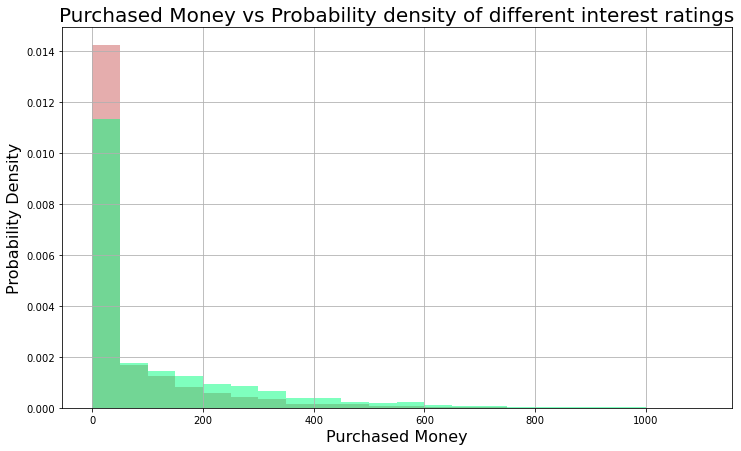

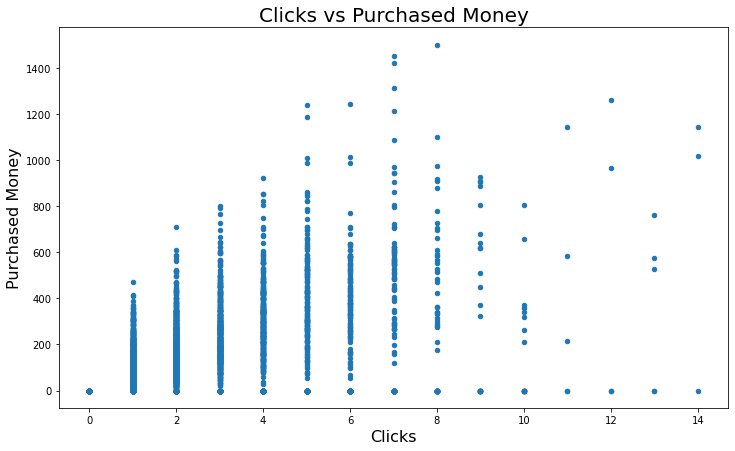

In [4]:
#Plots! 

#making an empty array to store the averages
sumsarr = []
sums = np.array(sumsarr)
fig, ax = plt.subplots(1,1, figsize = (12,7))

#finding the mean for each interest value and storing it in the array
i = 0
while i <= 10:
    dfmean = df.loc[(df['Interest'] == i)]
    dfmeansum = dfmean['Purchased'].mean()
    #print(dfmeansum)
    sums = np.append(sums, dfmeansum)
    i = i + 1
#print(sums)

#plotting the interest values vs the averages calculated above
ax.plot(list(range(0,11)), sums)
ax.set_xlabel("Interest", fontsize=16)
ax.set_ylabel("Purchased Money", fontsize=16)
ax.set_title("Interest vs Purchased Money", fontsize=20)
ax.grid(alpha=0.35)

#plotting the purchase value for interest rates below 6 overlayed with interest rates above 5
fig, ax = plt.subplots(1,1, figsize = (12,7))
binsList = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100]
df.loc[df['Interest'] < 6].hist(column = 'Purchased', ax = ax, facecolor = "indianred", density = True, alpha = .5, bins = binsList)
df.loc[df['Interest'] > 5].hist(column = 'Purchased', ax = ax, facecolor = "springgreen", density = True, alpha = .5, bins = binsList)
ax.set_xlabel("Purchased Money", fontsize=16)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_title("Purchased Money vs Probability density of different interest ratings", fontsize=20)

#plotting the scatterplot of clicks vs purchased money
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.plot.scatter(x='Clicks',y='Purchased', ax = ax)
ax.set_xlabel("Clicks", fontsize=16)
ax.set_ylabel("Purchased Money", fontsize=16)
ax.set_title("Clicks vs Purchased Money", fontsize=20)

**Markdown for C**

In the interest vs purchased money line graph, there is a clear upward trend with each increase in interest. Based on the graph, it is fair to assume that the higher a player rated the game, the more money they spent on it.

In the Purchased Money vs Probability density of different interest ratings histogram, the trends are tougher to spot. In the bin 0-50, there is significant increase of players who rated the game below 6 than those who rated it over 5. This is likely due to the fact that many players did not purchase anything on the game, thereby contributing to the 0-50 collumn. This was likely the case more in players who rated it lower. As the purchased money increases, the graph shows that more players rated the game higher than lower. It's likely indicitive of the fact that players who rate the game higher are more likely to purchase a large amount of money on the game.

Finally, in the clicks vs purchased money scatterplot, there is a vague upwards trend in purchased money based on the amount of clicks. The maximum values for each number of clicks has a clear increase. Additionally, the grouping of dots increase with each number of clicks, until the clicks fade out after 8 or so. It's difficult to gather much from this scatterplot, other than a slight increase in purchases with additional clicks. 

**Part D:** Analyze *bands*

We want to keep our high-paying job in advertising technology (plus we get some free *Fledgies* each month, nice!), so we need to tell our bosses how well the ads are working, and who they are working on.  Player ages span from 8 years old to 78 years old.  Breaking down the data into **bands** of 10-years (e.g. $[8-18), [18-27.99), \dots [68-78]$) and split across the player's self-reported sex (3 possibilities).

Output the averages for interest, clicks, and purchases for each band as well as the average value of purchases-per-click.

In other words, report the requested averages
- For each Sex
- For each Age Band
- For each Sex+Age Band combination

In [5]:
#Make bands, and compute relevant stats for each

#calculating the means for band1
band1 = df.loc[(df['Age'] >= 8) & (df['Age'] < 18)]
band1Purchase = band1['Purchased'].mean()
band1Interest = band1['Interest'].mean()
band1Clicks = band1['Clicks'].mean()

#calculating the means for band2
band2 = df.loc[(df['Age'] >= 18) & (df['Age'] < 28)]
band2Purchase = band2['Purchased'].mean()
band2Interest = band2['Interest'].mean()
band2Clicks = band2['Clicks'].mean()

#calculating the means for band3
band3 = df.loc[(df['Age'] >= 28) & (df['Age'] < 38)]
band3Purchase = band3['Purchased'].mean()
band3Interest = band3['Interest'].mean()
band3Clicks = band3['Clicks'].mean()

#calculating the means for band4
band4 = df.loc[(df['Age'] >= 38) & (df['Age'] < 48)]
band4Purchase = band4['Purchased'].mean()
band4Interest = band4['Interest'].mean()
band4Clicks = band4['Clicks'].mean()

#calculating the means for band5
band5 = df.loc[(df['Age'] >= 48) & (df['Age'] < 58)]
band5Purchase = band5['Purchased'].mean()
band5Interest = band5['Interest'].mean()
band5Clicks = band5['Clicks'].mean()

#calculating the means for band6
band6 = df.loc[(df['Age'] >= 58) & (df['Age'] < 68)]
band6Purchase = band6['Purchased'].mean()
band6Interest = band6['Interest'].mean()
band6Clicks = band6['Clicks'].mean()

#calculating the means for band7
band7 = df.loc[(df['Age'] >= 68) & (df['Age'] < 78)]
band7Purchase = band7['Purchased'].mean()
band7Interest = band7['Interest'].mean()
band7Clicks = band7['Clicks'].mean()

#calculating the means for males
sexM = df.loc[(df['Sex'] == "M")]
sexMPurchase = sexM['Purchased'].mean()
sexMInterest = sexM['Interest'].mean()
sexMClicks = sexM['Clicks'].mean()

#calculating the means for females
sexF = df.loc[(df['Sex'] == "F")]
sexFPurchase = sexF['Purchased'].mean()
sexFInterest = sexF['Interest'].mean()
sexFClicks = sexF['Clicks'].mean()

#calculating the means for unspecified sex's
sexU = df.loc[(df['Sex'] == "Unclassified")]
sexUPurchase = sexU['Purchased'].mean()
sexUInterest = sexU['Interest'].mean()
sexUClicks = sexU['Clicks'].mean()

#calculating the means for band1 and males
band1M = df.loc[(df['Age'] >= 8) & (df['Age'] < 18) & (df['Sex'] == "M")]
band1MPurchase = band1M['Purchased'].mean()
band1MInterest = band1M['Interest'].mean()
band1MClicks = band1M['Clicks'].mean()

#calculating the means for band1 and females
band1F = df.loc[(df['Age'] >= 8) & (df['Age'] < 18) & (df['Sex'] == "F")]
band1FPurchase = band1F['Purchased'].mean()
band1FInterest = band1F['Interest'].mean()
band1FClicks = band1F['Clicks'].mean()

#calculating the means for band1 and unspecified sex's
band1U = df.loc[(df['Age'] >= 8) & (df['Age'] < 18) & (df['Sex'] == "Unclassified")]
band1UPurchase = band1U['Purchased'].mean()
band1UInterest = band1U['Interest'].mean()
band1UClicks = band1U['Clicks'].mean()

#calculating the means for band2 and males
band2M = df.loc[(df['Age'] >= 18) & (df['Age'] < 28) & (df['Sex'] == "M")]
band2MPurchase = band2M['Purchased'].mean()
band2MInterest = band2M['Interest'].mean()
band2MClicks = band2M['Clicks'].mean()

#calculating the means for band2 and females
band2F = df.loc[(df['Age'] >= 18) & (df['Age'] < 28) & (df['Sex'] == "F")]
band2FPurchase = band2F['Purchased'].mean()
band2FInterest = band2F['Interest'].mean()
band2FClicks = band2F['Clicks'].mean()

#calculating the means for band2 and unspecified sex's
band2U = df.loc[(df['Age'] >= 18) & (df['Age'] < 28) & (df['Sex'] == "Unclassified")]
band2UPurchase = band2U['Purchased'].mean()
band2UInterest = band2U['Interest'].mean()
band2UClicks = band2U['Clicks'].mean()

#calculating the means for band3 and males
band3M = df.loc[(df['Age'] >= 28) & (df['Age'] < 38) & (df['Sex'] == "M")]
band3MPurchase = band3M['Purchased'].mean()
band3MInterest = band3M['Interest'].mean()
band3MClicks = band3M['Clicks'].mean()

#calculating the means for band3 and females
band3F = df.loc[(df['Age'] >= 28) & (df['Age'] < 38) & (df['Sex'] == "F")]
band3FPurchase = band3F['Purchased'].mean()
band3FInterest = band3F['Interest'].mean()
band3FClicks = band3F['Clicks'].mean()

#calculating the means for band3 and unspecified sex's
band3U = df.loc[(df['Age'] >= 28) & (df['Age'] < 38) & (df['Sex'] == "Unclassified")]
band3UPurchase = band3U['Purchased'].mean()
band3UInterest = band3U['Interest'].mean()
band3UClicks = band3U['Clicks'].mean()

#calculating the means for band4 and males
band4M = df.loc[(df['Age'] >= 38) & (df['Age'] < 48) & (df['Sex'] == "M")]
band4MPurchase = band4M['Purchased'].mean()
band4MInterest = band4M['Interest'].mean()
band4MClicks = band4M['Clicks'].mean()

#calculating the means for band4 and females
band4F = df.loc[(df['Age'] >= 38) & (df['Age'] < 48) & (df['Sex'] == "F")]
band4FPurchase = band4F['Purchased'].mean()
band4FInterest = band4F['Interest'].mean()
band4FClicks = band4F['Clicks'].mean()

#calculating the means for band4 and unspecified sex's
band4U = df.loc[(df['Age'] >= 38) & (df['Age'] < 48) & (df['Sex'] == "Unclassified")]
band4UPurchase = band4U['Purchased'].mean()
band4UInterest = band4U['Interest'].mean()
band4UClicks = band4U['Clicks'].mean()

#calculating the means for band5 and males
band5M = df.loc[(df['Age'] >= 48) & (df['Age'] < 58) & (df['Sex'] == "M")]
band5MPurchase = band5M['Purchased'].mean()
band5MInterest = band5M['Interest'].mean()
band5MClicks = band5M['Clicks'].mean()

#calculating the means for band5 and females
band5F = df.loc[(df['Age'] >= 48) & (df['Age'] < 58) & (df['Sex'] == "F")]
band5FPurchase = band5F['Purchased'].mean()
band5FInterest = band5F['Interest'].mean()
band5FClicks = band5F['Clicks'].mean()

#calculating the means for band5 and unspecified sex's
band5U = df.loc[(df['Age'] >= 48) & (df['Age'] < 58) & (df['Sex'] == "Unclassified")]
band5UPurchase = band5U['Purchased'].mean()
band5UInterest = band5U['Interest'].mean()
band5UClicks = band5U['Clicks'].mean()

#calculating the means for band6 and males
band6M = df.loc[(df['Age'] >= 58) & (df['Age'] < 68) & (df['Sex'] == "M")]
band6MPurchase = band6M['Purchased'].mean()
band6MInterest = band6M['Interest'].mean()
band6MClicks = band6M['Clicks'].mean()

#calculating the means for band6 and females
band6F = df.loc[(df['Age'] >= 58) & (df['Age'] < 68) & (df['Sex'] == "F")]
band6FPurchase = band6F['Purchased'].mean()
band6FInterest = band6F['Interest'].mean()
band6FClicks = band6F['Clicks'].mean()

#calculating the means for band6 and unspecified sex's
band6U = df.loc[(df['Age'] >= 58) & (df['Age'] < 68) & (df['Sex'] == "Unclassified")]
band6UPurchase = band6U['Purchased'].mean()
band6UInterest = band6U['Interest'].mean()
band6UClicks = band6U['Clicks'].mean()

#calculating the means for band7 and males
band7M = df.loc[(df['Age'] >= 68) & (df['Age'] < 78) & (df['Sex'] == "M")]
band7MPurchase = band7M['Purchased'].mean()
band7MInterest = band7M['Interest'].mean()
band7MClicks = band7M['Clicks'].mean()

#calculating the means for band7 and females
band7F = df.loc[(df['Age'] >= 68) & (df['Age'] < 78) & (df['Sex'] == "F")]
band7FPurchase = band7F['Purchased'].mean()
band7FInterest = band7F['Interest'].mean()
band7FClicks = band7F['Clicks'].mean()

#calculating the means for band7 and unspecified sex's
band7U = df.loc[(df['Age'] >= 68) & (df['Age'] < 78) & (df['Sex'] == "Unclassified")]
band7UPurchase = band7U['Purchased'].mean()
band7UInterest = band7U['Interest'].mean()
band7UClicks = band7U['Clicks'].mean()

print("Relevant stats for each band")
print("For band1 (ages 8-17), the average purchase was ", band1Purchase, "the average interest was", band1Interest, "and the average clicks were", band1Clicks)
print("For band2 (ages 18-27), the average purchase was ", band2Purchase, "the average interest was", band2Interest, "and the average clicks were", band2Clicks)
print("For band3 (ages 28-37), the average purchase was ", band3Purchase, "the average interest was", band3Interest, "and the average clicks were", band3Clicks)
print("For band4 (ages 38-47), the average purchase was ", band4Purchase, "the average interest was", band4Interest, "and the average clicks were", band4Clicks)
print("For band5 (ages 48-57), the average purchase was ", band5Purchase, "the average interest was", band5Interest, "and the average clicks were", band5Clicks)
print("For band6 (ages 58-67), the average purchase was ", band6Purchase, "the average interest was", band6Interest, "and the average clicks were", band6Clicks)
print("For band7(ages 58-67), the average purchase was ", band7Purchase, "the average interest was", band7Interest, "and the average clicks were", band7Clicks)
print("\n")

print("Relevant stats for each sex")
print("For males, the average purchase was ", sexMPurchase, "the average interest was", sexMInterest, "and the average clicks were", sexMClicks)
print("For females, the average purchase was ", sexFPurchase, "the average interest was", sexFInterest, "and the average clicks were", sexFClicks)
print("For unspecified sex's, the average purchase was ", sexUPurchase, "the average interest was", sexUInterest, "and the average clicks were", sexUClicks)
print("\n")

print("Relevant stats for band1 and each sex")
print("For males in band1 (ages 8-17), the average purchase was ", band1MPurchase, "the average interest was", band1MInterest, "and the average clicks were", band1MClicks)
print("For females in band1 (ages 8-17), the average purchase was ", band1FPurchase, "the average interest was", band1FInterest, "and the average clicks were", band1FClicks)
print("For unspecified sex's, in band1 (ages 8-17), the average purchase was ", band1UPurchase, "the average interest was", band1UInterest, "and the average clicks were", band1UClicks)
print("\n")

print("Relevant stats for band2 and each sex")
print("For males in band2 (ages 18-27), the average purchase was ", band2MPurchase, "the average interest was", band2MInterest, "and the average clicks were", band2MClicks)
print("For females in band2 (ages 18-27), the average purchase was ", band2FPurchase, "the average interest was", band2FInterest, "and the average clicks were", band2FClicks)
print("For unspecified sex's, in band2 (ages 18-27), the average purchase was ", band2UPurchase, "the average interest was", band2UInterest, "and the average clicks were", band2UClicks)
print("\n")

print("Relevant stats for band3 and each sex")
print("For males in band3 (ages 28-37), the average purchase was ", band3MPurchase, "the average interest was", band3MInterest, "and the average clicks were", band3MClicks)
print("For females in band3 (ages 28-37), the average purchase was ", band3FPurchase, "the average interest was", band3FInterest, "and the average clicks were", band3FClicks)
print("For unspecified sex's, in band3 (ages 28-37), the average purchase was ", band3UPurchase, "the average interest was", band3UInterest, "and the average clicks were", band3UClicks)
print("\n")

print("Relevant stats for band4 and each sex")
print("For males in band4 (ages 38-47), the average purchase was ", band4MPurchase, "the average interest was", band4MInterest, "and the average clicks were", band4MClicks)
print("For females in band4 (ages 38-47), the average purchase was ", band4FPurchase, "the average interest was", band4FInterest, "and the average clicks were", band4FClicks)
print("For unspecified sex's, in band4 (ages 38-47), the average purchase was ", band4UPurchase, "the average interest was", band4UInterest, "and the average clicks were", band4UClicks)
print("\n")

print("Relevant stats for band5 and each sex")
print("For males in band5 (ages 48-57), the average purchase was ", band5MPurchase, "the average interest was", band5MInterest, "and the average clicks were", band5MClicks)
print("For females in band5 (ages 48-57), the average purchase was ", band5FPurchase, "the average interest was", band5FInterest, "and the average clicks were", band5FClicks)
print("For unspecified sex's, in band5 (ages 48-57), the average purchase was ", band5UPurchase, "the average interest was", band5UInterest, "and the average clicks were", band5UClicks)
print("\n")

print("Relevant stats for band6 and each sex")
print("For males in band6 (ages 58-67), the average purchase was ", band6MPurchase, "the average interest was", band6MInterest, "and the average clicks were", band6MClicks)
print("For females in band6 (ages 58-67), the average purchase was ", band6FPurchase, "the average interest was", band6FInterest, "and the average clicks were", band6FClicks)
print("For unspecified sex's, in band6 (ages 58-67), the average purchase was ", band6UPurchase, "the average interest was", band6UInterest, "and the average clicks were", band6UClicks)
print("\n")

print("Relevant stats for band7 and each sex")
print("For males in band7 (ages 68-77), the average purchase was ", band7MPurchase, "the average interest was", band7MInterest, "and the average clicks were", band7MClicks)
print("For females in band7 (ages 68-77), the average purchase was ", band7FPurchase, "the average interest was", band7FInterest, "and the average clicks were", band7FClicks)
print("For unspecified sex's, in band7 (ages 68-77), the average purchase was ", band7UPurchase, "the average interest was", band7UInterest, "and the average clicks were", band7UClicks)

Relevant stats for each band
For band1 (ages 8-17), the average purchase was  53.33947178877693 the average interest was 6.512820512820513 and the average clicks were 1.8512820512820514
For band2 (ages 18-27), the average purchase was  70.92306476143507 the average interest was 5.640984908657665 and the average clicks were 1.584590945194599
For band3 (ages 28-37), the average purchase was  102.89017301199694 the average interest was 5.638162544169611 and the average clicks were 1.6558303886925796
For band4 (ages 38-47), the average purchase was  91.78965905556183 the average interest was 5.6814404432132966 and the average clicks were 1.6551246537396123
For band5 (ages 48-57), the average purchase was  75.2389180038424 the average interest was 5.577893175074184 and the average clicks were 1.704005934718101
For band6 (ages 58-67), the average purchase was  107.95924414504725 the average interest was 5.565604151223129 and the average clicks were 1.949592290585619
For band7(ages 58-67), th

**Part E:** Discuss

Discuss the results from **D** *in detail*.  In particular, you should do the following:
- (i) Highlight the general trend of bands: which ages/sexes tend to buy more or less?  Which ages tend to buy more or less?
- (ii) Are there any bands that suggest some age groups behave differently between men and women?  Which ones, and how do they differ?
- (iii) What groups should management target if they want to target the groups that currently purchase the most?
- (iv) What groups might management target if they want to target groups with unusually low purchases?
- (v) Does the highest "Interest" subgroup purchase the most?  Is this consistent with your results in **C**?

**Markdown for E**

(i) In nearly every age group, males purchased more than females, and females purchased more than unclassified sexes. This trend is indicitive of males spending the most on purchases. Between each age group band, there aren't any clear trends. However, the age group of 58-67 has the highest average purchase while the age group of 8-17 purchases the least.

(ii) The age group 58-67 is the only age group where women purchase more than men on average. In fact, women in this age group has the highest average purchase value for any sex in any age group.

(iii) Management should clearly target women in the age group 58-67, as they by far have the highest purchase value. Management should aditionally target men in the 28-37 age group and men in the 38-47 age group, as these are the top three spenders.

(iv) Across all sexes, the 8-18 age group and the 67-77 age group have the lowest purchasing averages. Management should target these age groups for all sexes

(v) The highest average interest was reported by males in the 8-17 age group. Contrary to what I said in part C, this group has one of the lowest average purchse.

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [60 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent persons that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

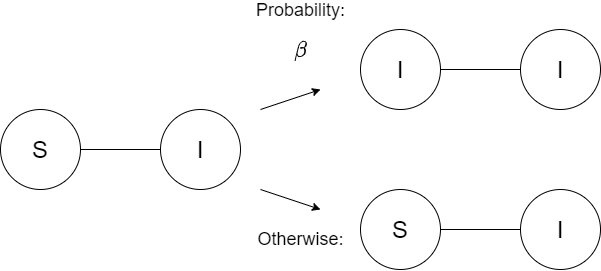

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

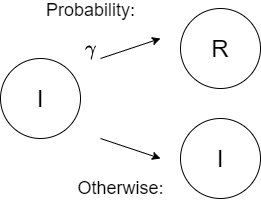

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups (These *are* graded)

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

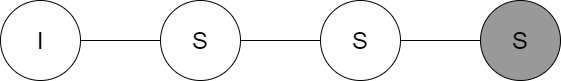

- What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  

- What is the exact probability that the leftmost node is still infected at this time?  

**Markdown for Part A**:

The exact probability that the last node on the right is an infected node after exactly 3 time steps is $\beta^3$. Since each node has an equal probability of being infected, and there are three nodes between the left most infected node and the right most node, that probability is raised to the power of 3.

The exact probability that the leftmost node is still infected is $(1-\gamma)^3$ Since each node has an equal probability of becoming reovered, and there are 3 time steps, that probability is inversed and raised to the power of 3

**Part B**: Use your named distributions.
- Each of the prior 2 questions is exactly described by one of the named variables covered in class.  Which variable, at what value(s) are we evaluating its pdf, and what is its parameter?
- What is the average (mean) recovery time for an infected person?
- Suppose an `S` node has exactly 4 `I` neighbors, and the probability of transmission is $\beta=0.5$.  What is the exact probability that that $S$ node is infected in the next time step?

**Markdown for Part B**:

- $\beta$ is a binomial random variable because it measures the number of successes (infections) within a sample (edges). We are evaluating its pdf by number of successes. As for $\gamma$, it is a geometric random variable because it measures the number of trials (days) until the first success (recovery). We are evaluating its pdf until first success.
- When an infected person becomes recovered, this is marked by the first success of $\gamma$. Since $\gamma$ is a geometric random variable, the mean for the recovery time is $\frac{1}{\gamma}$
- With 4 neighbors, only a single instance of transmission needs to occur. Since $\beta = .5$, a the probability of a single instance of $\beta$ occuring a single time in four attempts is equal to 

$1-(1-.5)^4 = .9375$

**Part C**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

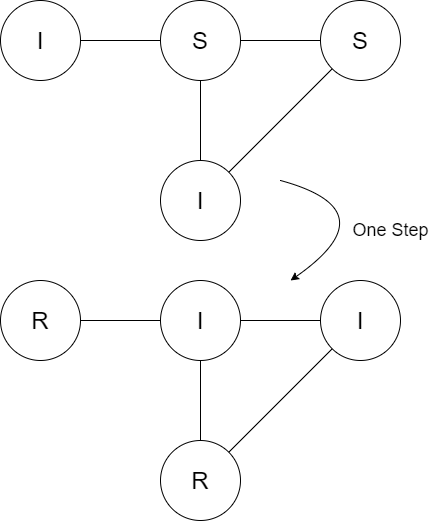

- What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  

Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Markdown for Part C**:

The center S node has a probability of infection of $(\beta+\beta - \beta^2)$ due to its connection with two infected nodes. The right S node has a probability of infection of $\beta$ due to its connection with a single infected node. The probability of each infected node becomming reovered is $\gamma$ each. Therefore, the probability that the top graph transitions to the bottom graph in a single time step is:

$(\beta+\beta - \beta^2) * \beta * \gamma^2$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

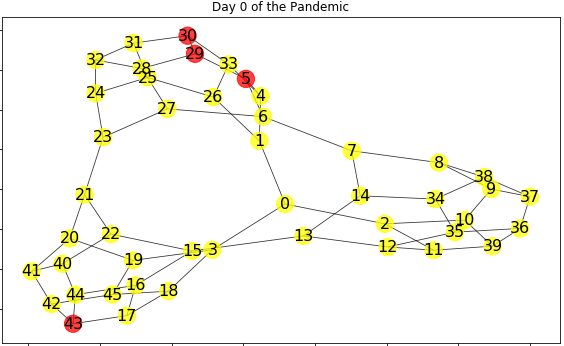

For your convenience, the two most common ways to represent this are listed below.  `edges` contains a list of each of the edges of the graph, and `neighbors` is a dictionary that contains the neighbors of each node (as a list of connected nodes).

`nodes` holds the 46 vertices, labelled by their indexes 0 through 45.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [6]:
#manual edge assignments
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

#create a dictionary as option
nodes = list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2, 3]
Node #  1  has neighbors of  [0, 4, 26]
Node #  2  has neighbors of  [0, 10, 11]
Node #  3  has neighbors of  [0, 18, 19]
Node #  4  has neighbors of  [1, 5, 33]
Node #  5  has neighbors of  [4, 6, 29]
Node #  6  has neighbors of  [5, 7, 27]
Node #  7  has neighbors of  [6, 8, 14]
Node #  8  has neighbors of  [7, 9, 38]
Node #  9  has neighbors of  [8, 10, 37]
Node #  10  has neighbors of  [2, 9, 39]
Node #  11  has neighbors of  [2, 12, 39]
Node #  12  has neighbors of  [11, 13, 35]
Node #  13  has neighbors of  [12, 14, 15]
Node #  14  has neighbors of  [7, 13, 34]
Node #  15  has neighbors of  [13, 16, 22]
Node #  16  has neighbors of  [15, 17, 44]
Node #  17  has neighbors of  [16, 18, 43]
Node #  18  has neighbors of  [3, 17, 45]
Node #  19  has neighbors of  [3, 20, 45]
Node #  20  has neighbors of  [19, 21, 41]
Node #  21  has neighbors of  [20, 22, 23]
Node #  22  has neighbors of  [15, 21, 40]
Node #  23  has neighbors of  [21, 24, 27]
No

**Part D:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.


In [7]:
import random
def SIR_step(initial_state, gamma, beta):
    #Your code here
    #setting up the new state
    new_state = initial_state
    i = 0
    totalI = []
    x = 0
    #tracking the initial I's
    while x < len(initial_state):
        if(initial_state[x] == "I"):
            totalI = np.append(totalI, x)
        x = x + 1
    #going through the entire graph
    while i < len(initial_state):
        #checking if node is S
        if(initial_state[i] == "S"):
            totalEdges = 0
            j = 0
            #calculating how many connnections to an I node the S node has
            while j < len(edges):
                if(edges[j][0] == i or edges[j][1] == i):
                    y = 0
                    while y < len(totalI):
                        if(edges[j][0] == totalI[y] or edges[j][1] == totalI[y]): 
                            totalEdges = totalEdges + 1
                        y = y + 1
                j = j + 1
            #if no connections, it stays an S
            if(totalEdges == 0):
                new_state[i] = "S"
            #if 1 connection, run a probability sim using beta
            elif(totalEdges == 1):
                if(random.random() < beta):
                    new_state[i] = "I"
            #if 2 connections, run a probability sim with the fomula used in the warmup
            elif(totalEdges == 2):
                prob = (beta + beta - beta ** 2)
                if(random.random() < prob):
                    new_state[i] = "I"
            #if 3 connections, run a probability sim with the fomula used in the warmup
            elif(totalEdges == 3):
                prob = (beta + beta + beta - beta ** 3)
                if(random.random() < prob):
                    new_state[i] = "I"
            #there can never be more than 3 connections so the cases end here
        #if node is an I, run probability sim using gamma
        elif(initial_state[i] == "I"):
            if(random.random() < gamma):
                new_state[i] = "R"
        i = i + 1
    return (", ".join([str(x) for x in new_state]))
initial_state = ["S", "S", "S", "S", "S", "I", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "I", "I", "S",
                 "S", "S", "S", "S", "S", "S", "S", "S",
                 "S", "S", "S", "I", "S", "S"]
SIR_step(initial_state, .5, .40)
#gamma is recovery
#beta is infected

'S, S, S, S, I, I, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, I, I, S, S, I, S, S, S, S, S, S, S, S, S, R, I, S'

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [8]:
#Check your code is working for those trivial cases:
initial_stateNoI = ["S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S",
                 "S", "S", "S", "S", "S", "S", "S", "S",
                 "S", "S", "S", "S", "S", "S"]
print(SIR_step(initial_stateNoI, .5, .5))
initial_stateWithI = ["S", "S", "S", "S", "S", "I", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "S", 
                 "S", "S", "I", "S", "I", "S", "S", "S", 
                 "S", "S", "S", "S", "S", "S", "S", "I",
                 "S", "S", "S", "I", "S", "S", "S", "S",
                 "S", "S", "S", "S", "S", "S"]
print(SIR_step(initial_stateWithI, .5, 0))

S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S
S, S, S, S, S, R, S, S, S, S, S, S, S, S, S, S, S, S, I, S, I, S, S, S, S, S, S, S, S, S, S, R, S, S, S, I, S, S, S, S, S, S, S, S, S, S


**Part E:**

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is such that nodes 5,29,30, and 43 are infected and the rest are susceptible.  Code for this is given below.

Now we want to create a function or a loop that runs **SIR_step** for 100 time steps.  

At the end of 100 steps, we will return only a tuple of two integers.  First, the total number of nodes that were infected over the course of the epidemic; and second, and the total days spent infected across all nodes.  These are two good measures of the severity of the epidemic!  When we take 100 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 100-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 100.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.


In [9]:
#given initialization; 'states' has 42 'S' nodes and 4 'I' nodes
states=np.array(['S']*46)
infected_states=set([5,29,30, 43])

for idx in infected_states:
    states[idx]='I'

def SIR_sim(gamma, beta, initial_state=states, n_steps=100):
    #do the thing!
    #for n_steps steps
        #take an SIR step
        #record how many additional days were lost
    #once done, see how many people got infected?
    i = 0
    days_lost = 0
    people_infected = 0
    #run for each step
    while i < n_steps:
        tempIncrement = 0
        #print(SIR_step(initial_state, gamma, beta))
        #calculate the cummulative number of days the population is sick
        daySetup = SIR_step(initial_state, gamma, beta)
        j = 0
        #calculate the number of infected people on each day
        while j < len(daySetup):
            if(daySetup[j] == "I"):
                tempIncrement = tempIncrement + 1
            if(tempIncrement > people_infected):
                people_infected = tempIncrement
            j = j + 1
        days_lost = days_lost + tempIncrement
        i = i + 1
    return days_lost, people_infected

SIR_sim(.1, .2, states, 100)

(369, 14)

**Part F:**

Run your function in part D 100 times (so you'll have 100 instances of 100 time steps) *each* for 3 different sets of values of the constants $\gamma$ and $\beta$.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.15.
* Second, when $\beta=0.1$ and $\gamma=0.2$.
* Finally, when $\beta=0.2$ and $\gamma=0.1$.

For each one of those 3 sets of experiments, report the average number of people infected and average number of days lost to infection.

Sanity checks: 
- Person count should be at least 4, possibly up to 46.
- Days lost could be as low as 0 if everybody recovers on day 1, possibly approaching $46\cdot 100$ if everybody is infected all 100 days.

In [10]:
#recommended output style:
listSum = []
def run100times(beta, gamma, n, listSum):
    i = 0
    #run for each n step
    while i < n:
        states=np.array(['S']*46)
        infected_states=set([5,29,30, 43])
        for idx in infected_states:
            states[idx]='I'
        
        #add the cummulative number of days sick to a numpy array
        temp0 = SIR_sim(beta, gamma, states, n)
        listSum = np.append(listSum, temp0)
        #print(states)
        i = i + 1
    x = 0
    y = 1
    days = []
    infected = []
    #add the number of infected people each day to a numpy array
    while x < len(listSum):
        days = np.append(days, listSum[x])
        x = x + 2
    while y < len(listSum):
        infected = np.append(infected, listSum[y])
        y = y + 2
    #print(sum(days)/100, sum(infected)/100)
    #return days_lost_mean, people_infected_mean
    print("For beta =", beta, "and gamma =", gamma, "lost", sum(days)/n, "days between", sum(infected)/n, "people")
run100times(.15, .15, 100, listSum)
run100times(.1, .2, 100, listSum)
run100times(.2, .1, 100, listSum)
# print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

For beta = 0.15 and gamma = 0.15 lost 145.05 days between 9.11 people
For beta = 0.1 and gamma = 0.2 lost 400.62 days between 16.96 people
For beta = 0.2 and gamma = 0.1 lost 53.41 days between 5.47 people


**Part G:**
What does a Vaccine do?  You should have found that the settings of $\beta=0.2$ and $\gamma=0.1$ typically caused the most dangerous pandemic.  These numbers represent a disease that takes on average around 10 time steps (days) to recover from, and is highly infectious in that period: numbers reasonable for current COVID-19 data.  

But suppose we have access to a vaccine, and when a person take a vaccine they are immediately set to be type `R` removed nodes.  We want to investigate the effects of a vaccine and whether or not our model can capture the idea of "herd" immunity, where sufficient vaccination imbues protections on the unvaccinated.

Suppose *before* the start of your SIR_sim you take exactly $k$ of the 42 `S` individuals and reclassify them as `R`, representing individuals who have been innoculated against infection.  Keep the same 4 infected people at the start of each run.  Run 50 simulations *each* for the values of $k=[0,4,8,12,...,40]$ for a total of 11 additional sets of simulations.

For each one of those 11 sets of experiments, save the average number of people infected and average number of days lost to infection.  

It should be clear that vaccination helps those that *are* vaccinated, but does it help the unvaccinated as well?  After your study of $k$, create a pair of side-by-side plots.  

- In the first, make the $x$-axis is $k$ and the $y$-axis the average number of days lost.
- In the second, again make the $x$-axis is $k$ and make the $y$-axis the average *proportion of initial `S` states* infected.
- Do there appear to be any values of $k$ which lead to larger decreases than others?  Which ones? 

In [11]:
#sims
import random
def runKtimes(beta, gamma, n, k, listSum, listGraphD, listGraphI, boolean):
    i = 0
    while i < n:
        states=np.array(['S']*46)
        infected_states=set([5,29,30, 43])

        for idx in infected_states:
            states[idx]='I'
        j = 0
        #setting up the random number of vaccinated people as Rs
        while j < k:
            while True:
                index = random.randint(0, len(states)-1)
                if(states[index] != "I" and states[index] != "R"):
                    break
            states[index] = "R"
            j = j + 1
        #add the cummulative number of days sick to a numpy array
        temp0 = SIR_sim(beta, gamma, states, n)
        listSum = np.append(listSum, temp0)
        #print(states)
        i = i + 1
    x = 0
    y = 1
    days = []
    infected = []
    #add the number of infected people each day to a numpy array
    while x < len(listSum):
        days = np.append(days, listSum[x])
        x = x + 2
    while y < len(listSum):
        infected = np.append(infected, listSum[y])
        y = y + 2
    #print(sum(days)/100, sum(infected)/100)
    #return days_lost_mean, people_infected_mean
    if(boolean):
        print("For", k, "vaccinated people, beta =", beta, "and gamma =", gamma, "lost", sum(days)/n, "days between", sum(infected)/n, "people")
    else:
        print("")
    #store each value for the plots later
    listGraphD = np.append(listGraphD, sum(days)/n)   
    listGraphI = np.append(listGraphI, sum(infected)/n)
    return(sum(days)/n, sum(infected)/n)

listSumk = []
listGraphD = []
listGraphI = []
h = 0
while h < 41: 
    runKtimes(.1,.2, 50, h, listSumk, listGraphD, listGraphI, True)
    listGraphD = np.append(listGraphD, runKtimes(.1,.2, 50, h, listSumk, listGraphD, listGraphI, False)[0])
    listGraphI = np.append(listGraphI, runKtimes(.1,.2, 50, h, listSumk, listGraphD, listGraphI, False)[1])
    h = h + 4
print(listGraphD, listGraphI)

For 0 vaccinated people, beta = 0.1 and gamma = 0.2 lost 368.08 days between 17.16 people


For 4 vaccinated people, beta = 0.1 and gamma = 0.2 lost 277.3 days between 12.82 people


For 8 vaccinated people, beta = 0.1 and gamma = 0.2 lost 224.78 days between 10.9 people


For 12 vaccinated people, beta = 0.1 and gamma = 0.2 lost 180.28 days between 9.2 people


For 16 vaccinated people, beta = 0.1 and gamma = 0.2 lost 121.62 days between 7.38 people


For 20 vaccinated people, beta = 0.1 and gamma = 0.2 lost 102.26 days between 6.72 people


For 24 vaccinated people, beta = 0.1 and gamma = 0.2 lost 79.98 days between 5.72 people


For 28 vaccinated people, beta = 0.1 and gamma = 0.2 lost 68.88 days between 4.98 people


For 32 vaccinated people, beta = 0.1 and gamma = 0.2 lost 54.92 days between 4.92 people


For 36 vaccinated people, beta = 0.1 and gamma = 0.2 lost 43.94 days between 4.14 people


For 40 vaccinated people, beta = 0.1 and gamma = 0.2 lost 41.64 days between 3.74 peopl

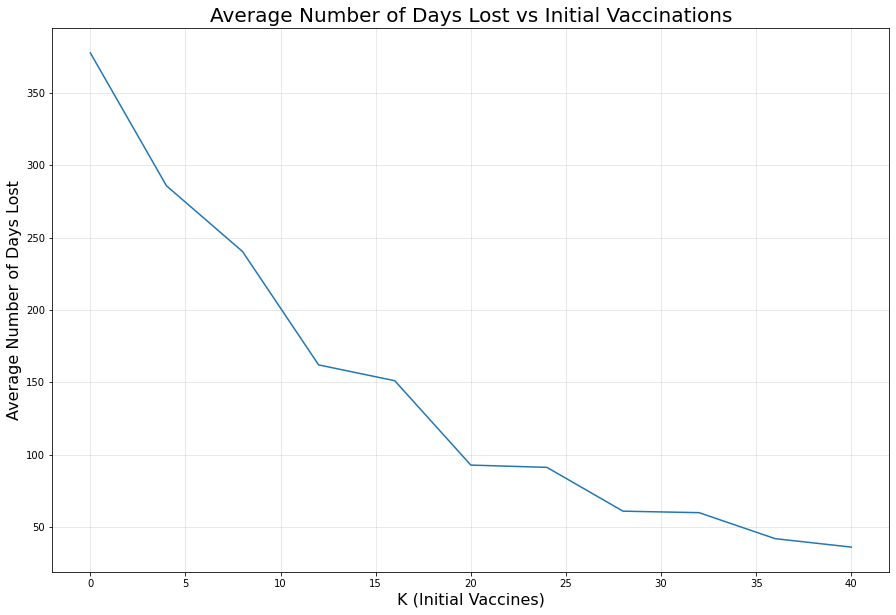

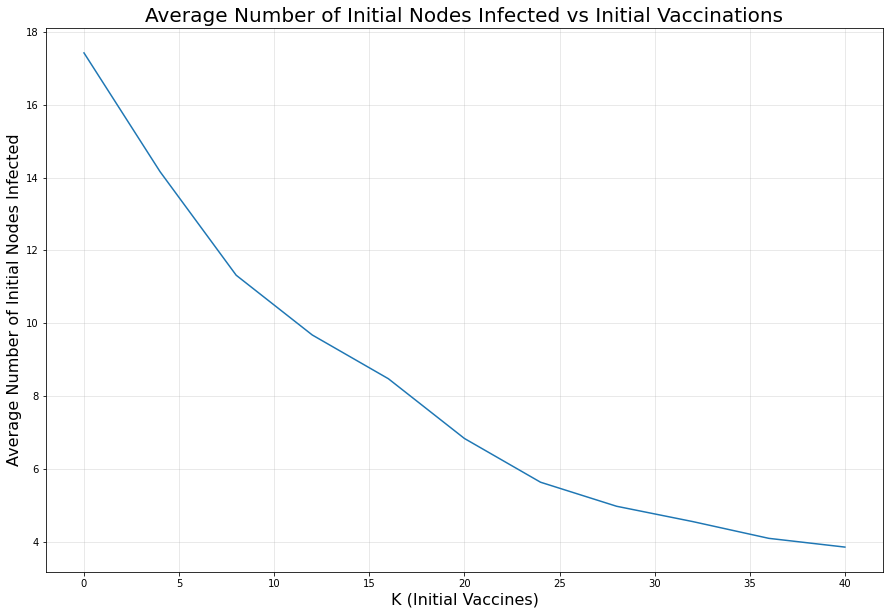

In [12]:
#plots
fig, ax = plt.subplots(1,1, figsize = (15,10))
k = [0,4,8,12,16,20,24,28,32,36,40]
ax.plot(k, listGraphD)
ax.set_xlabel("K (Initial Vaccines)", fontsize=16)
ax.set_ylabel("Average Number of Days Lost", fontsize=16)
ax.set_title("Average Number of Days Lost vs Initial Vaccinations", fontsize=20)
ax.grid(alpha=0.35)

fig, ax = plt.subplots(1,1, figsize = (15,10))
k = [0,4,8,12,16,20,24,28,32,36,40]
ax.plot(k, listGraphI)
ax.set_xlabel("K (Initial Vaccines)", fontsize=16)
ax.set_ylabel("Average Number of Initial Nodes Infected", fontsize=16)
ax.set_title("Average Number of Initial Nodes Infected vs Initial Vaccinations", fontsize=20)
ax.grid(alpha=0.35)

**Part H: **

Comment on anything you found interesting or unusual.

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.  This is pretty relevant for COVID-19, because current data suggest a long-term decline in antibodies whether they came from infection or from a vaccine, so we might want `R` node status to "wear off" after a while, or allow for a lesser but non-zero probability of infection from an `I` node.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check out the CS department's course offerings by Aaron Clauset, Dan Larremore, and others for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>

### Appendix: Graph plotting code

In [13]:
#here's the code to generate the given plot.  It is not needed for any of your tasks,
#...but if you're interested in including some visualizations in your analysis in parts F/G you can start with this!
#create the graph in networkx
import networkx as nx

#NB: this is a well known graph known as the "Tutte" graph
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

nodes=list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])

G=nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

np.random.seed(3022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex

infected=set([5,29,30, 43])
sus=set(range(46))-infected

colorf=lambda x: 'red' if (x in infected) else ('yellow' if x in sus else 'green')
colors=[colorf(node) for node in nodes]
labels=dict(zip(range(46),range(46))); #label 0-45

fig, ax=plt.subplots(figsize=(10,6))
#draw the nodes, using xy-node layout 'pos' provided
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=300, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.8); #draw edges, using xy-node layout provided
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
ax.set_title('Day 0 of the Pandemic');

ImportError: cannot import name 'gcd' from 'fractions' (/opt/conda/lib/python3.9/fractions.py)